### Modélisation du loyer - étude de cas sur un marché immobilier

#### Contexte de l'étude
 L’étude du marché immobilier d’une ville est souvent un exercice complexe nécessitant
 une compréhension approfondie des différents facteurs qui influent sur les prix des loyers.
 Parmi ces facteurs, la taille de l’habitation, le nombre de pièces disponibles et d’autres
 caractéristiques jouent un rôle crucial dans la détermination des prix.

#### Objectif de l'étude 
L'objectif de cette étude est de construire un modèle de régression linéaire multiple pour prédire
 le montant du loyer en fonction des deux autres variables.

In [1]:
# Bibliothèque utilisées
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

#### 1. Importation et Exploration des données

In [2]:
file_path = 'C:/Users/LENOVO/OneDrive - ACTED/Documents/CYPRIEN_28_03_2025/Master/Apprentissage Statistique/DAR/dataset.xlsx'
dataset = pd.read_excel(file_path)

##### Affichons les types de variables

##### Affichons les statistiques descriptives des variables

In [3]:
print(dataset.describe())

          Surface       Loyer       Rooms
count  200.000000  200.000000  200.000000
mean    41.278950   39.977810    2.440000
std     18.836139   19.435838    1.132614
min      8.000000    8.000000    1.000000
25%     25.000000   24.375000    1.000000
50%     43.850000   40.000000    2.000000
75%     56.000000   55.000000    3.000000
max     78.000000   78.900000    4.000000


#### Interprétation :
Toutes les trois variables de la base de données sont au format numéiques.\
Le nombre d'habitation considéré dans les données est 200.\
La surface moyenne d'une habitation est de 41,27895 m2. Le loyer moyen est 39,9778 mille avec en moyenne 2,44 pièces.\
L'habitation la plus vaste a 78 m2, avec un loyer moyen de 78,9 mille et 4 pièce en moyenne.\
L'habitation la plus petite a 8 m2, avec un loyer moyen de 8 mille contenant une pièce moyenne.

#### Affichons les visuels des données

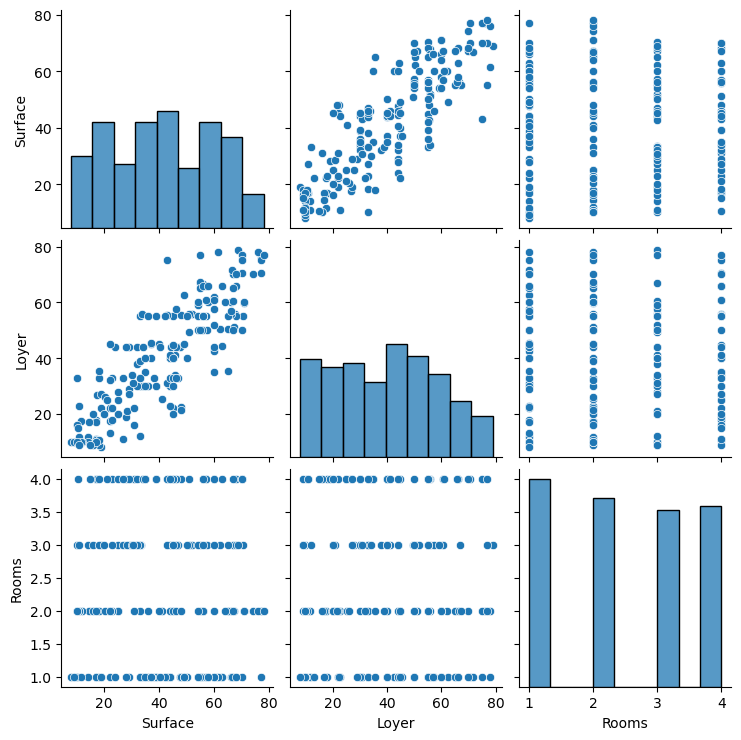

In [4]:
sns.pairplot(dataset) # module de la bibliothèque Seaborn (basée sur matplotlib) qui permet de faire la visualisation statistique
plt.show() # permet de forcer l'affichage graphique

#### Interprétation :
Le module pairplot(dataset) affiche une matrice de graphiques.\
En diagonales nous avons les histogrammes des variables prix individuellement.\
En hors diagonales nous avons les nuages de points entre les variables deux à deux distinctes. Cela permet de détecter les corrélations entre les variables.\
Suivant la diagonale, on a : \
Surface : l'histogramme de Surface a une concentration entre 30 m2 et 43 m2.\
Loyer : Le loyer semble bien réparti selon une distribution normale. \
Rooms : l'histogramme montre que le nombre de pièce va de 1 à 4 pièce par logement, avec un nombre assez équilibré de logements pour chaque nombre de pièces.\
 \
Le nuage de points entre Surface et Loyer montre une corrélation linéaire positive. Plus la surface augmente, plus le loyer augmente. La surface pourrait être une bonne variable explicative pour la modélisation du loyer.\
Les nuages de points entre le nombre de pièce et les autres variables ne fournit pas une bonne allure. En effet la variable catégorielle discrète.

#### Affichons la matrice de corrélation

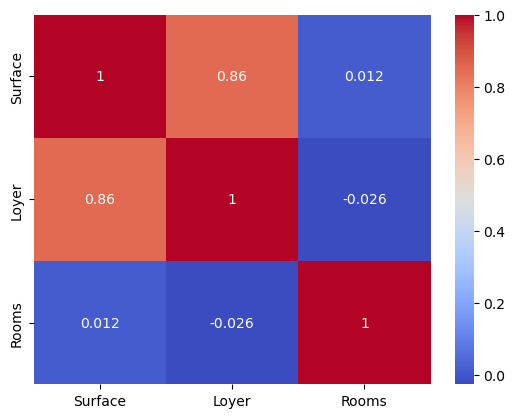

In [5]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Interprétation :
La matrice de corrélation de corrélation montre qu'il existe une forte corrélation linéaire positive entre la surface et le loyer.\
Il existe une très faible corrélation linéaire négative entre le loyer et le nombre de pièce. De même il existe une très faible corrélation linéaire positive entre la surface et le nombre de pièce.

#### 2. Modélisation
##### Selection du target et features

In [6]:
features = ['Surface', 'Rooms']
X = dataset[features]
y = dataset.Loyer

#### Divisons les données en ensembles d'apprentissage et de test et créons le modèle de régression linéaire

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

#### Entraînons le modèle et affichons les coefficients du modèle

In [8]:
model.fit(X_train, y_train)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [ 0.86883991 -0.8884175 ]
Intercept: 6.579256860987357


#### Interprétation :
Les coéfficients de régression associés aux variables Surface et Rooms sont respectivement 0.8688 et -0.8884. Cela signifie que que si la surface augmente d'un mètre carré, le loyer augmente de 868,8 FCFA.\ 
De même si le nombre de pièce augmente d'une unité, le prix du loyer baisse de 888,4 FCFA. Cela est insignifiant et non logique et pourrait s'expliquer une absence de rélation linéaire entre ces deux variables.\
La constante vaut 6.57925, cela signifie que le prix moyen d'unloyer est est de 6579.25

#### 3. Prédiction : 
##### Faisons la prédiction d'un loyer pour une habitation ayant une surface de 70 m2 et comportant 4 pièces.

In [10]:
surface = 70
pieces = 4
predicted_rent = model.predict(X)
print(f'Prédiction du loyer pour une habitation de {surface} m² avec {pieces} pièces: {predicted_rent[0]}')

Prédiction du loyer pour une habitation de 70 m² avec 4 pièces: 34.36255635973996


#### Interprétation :
Pour une habitation de 70 m2 avec 4 pièces, le loyer s'élève à 34362.55 FCFA

#### 4. Diagnostic du modèle

##### 4.1 - Analysons les résidus du modèle (distribution, tendance). 

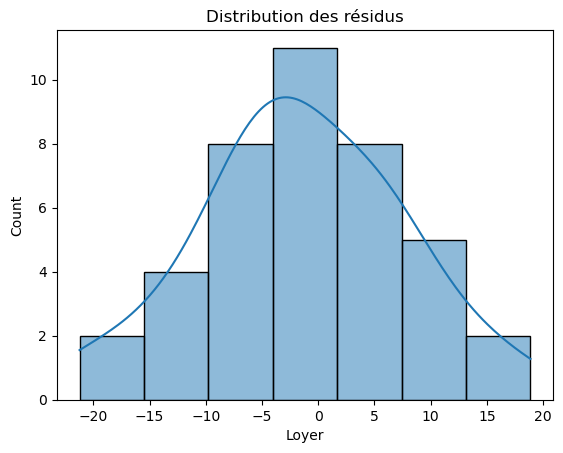

In [11]:
# Déterminons et Analysons les résidus
y_pred = model.predict(X_test)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.show()

#### Interprétation :
Le graphique montre que les résidus semblent suivre une distribution normale centrée.

##### 4.2 - Vérifions les hypothèses de linéarité, d'homoscédasticité et de normalité des résidus

#### Test de linéarité : Méthodes visuelles avec scikit-learn

###### S'il y a une répartition aléatoire des résidus autour de 0 → le modèèle est linéaire

###### Si la courbe est en forme de U ou en vague → il y a non-linéarité

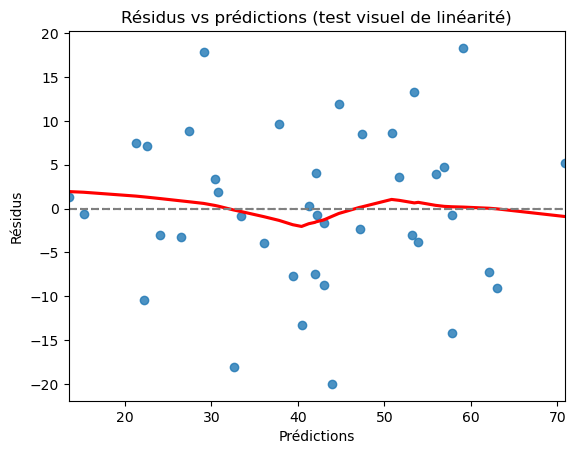

In [12]:
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.title("Résidus vs prédictions (test visuel de linéarité)")
plt.show()

#### Interprétation :
Les points bleus représentent chaque observation (résidu vs prédiction)\
La courbe rouge représente la courbe de tendance des residus.\
 \
Les résidus sont globalement centrés autour de 0. La courbe ne semble pas avoir une tendance en U. En conclusion nous pouvons dire que le modèle semble assez linéaire.

#### Test d'homoscédasticité : méthodes visuelles

#### Homoscédasticité (variance des résidus stable) :
Les points sont répartis de façon aléatoire autour de la ligne 0 (ligne horizontale).\
La dispersion verticale des points reste à peu près constante sur tout l’axe des prédictions.\
Pas de forme particulière (pas de cône, pas de courbe, pas d'entonnoir).

#### Hétéroscédasticité (variance non stable) :
La dispersion des résidus augmente ou diminue avec les prédictions.\
On observe souvent une forme en cône ou en entonnoir : Petit au début, plus grand à la fin implique que la variance des résidus augmente avec les prédictions.

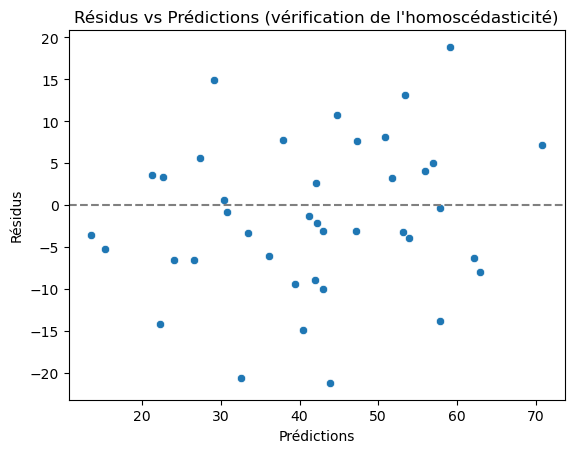

In [13]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.title("Résidus vs Prédictions (vérification de l'homoscédasticité)")
plt.show()

#### Interprétation : 
Les points sont dispersés de manière assez uniforme autour de la ligne horizontale à 0.\
Il n'y a pas de forme particulière (pas de cône, ni entonnoir, ni V).\
La dispersion verticale des résidus semble relativement constante quel que soit le niveau de prédiction (de 10 à 70).\
 \
On peut donc dire qu'il y a homoscédasticité et donc l’erreur du modèle est stable.

#### Test de normalité des résidus : Test de Shapiro

##### H0 : Les résidus suivent une loi normale
##### H1 : Les résidus ne suivent pas une loi normale
On rejette H0 si la p_value <= 0.05

In [14]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f'Statistique de test = {stat:.4f}, p-value = {p_value:.4f}')

Statistique de test = 0.9896, p-value = 0.9695


#### Interprétation : 
La p-value =0.9695 est supérieure à 0.05, on ne rejette pas H0, donc les résidus suivent une distribution normale.

#### 5. Évaluation et validation

##### Évaluons les performances du modèle sur les données de test : calcul du RMSE
###### RMSE = Racine carrée de l'erreur quadratique moyenne. Il mesure l’écart moyen entre les valeurs prédites et les valeurs observées (vraies). Il s’exprime dans la même unité que la variable cible et permet de se prononcer sur la stabilité du modèle.

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 9.092688753283774


#### Interprétation : 
RMSE = 9.09268, cela signifie que les prédictions s’écartent de 9092,68 FCFA par rapport aux vraies valeurs.
Le modèle semble être instable.

#### 6. Discussion

#### Identifions la variable ayant le plus d'impact sur le loyer : Analysons les coefficients du modèle

La matrice de corrélation a montré qu'il existe une forte rélation entre le loyer et la surface de l'habitation. Les coefficients de régressions montre que si la surface de l'habitation augmente d'un mètre carré, le prix du loyer augmente de 868,8 FCFA. Ainsi la surface de l'habitation est la variable ayant le plus d'impact sur le loyer.

##### Proposons des améliorations possibles
Pour augmenter la modélisation du prix du loyer des logements, nous suggérons d'augmenter le nombre de variable explicative et aussi du nombre d'observation. En effet, le nombre de pièce est une variable quantitative mais à l'apparence d'une variable catégorielle. Plus on a d'observation plus cette variable expliquera mieux le loyer.